# BREAST Cancer - KPCA - Classification

In [1]:
#Import packages
import pandas as pd
import numpy as np

#import xgboost
from xgboost import XGBClassifier

#import sklearn 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import *
from sklearn import metrics

import shap

import os

import  warnings
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Preprocessing of data 

### Load data and Declare feature vector and target variable

In [2]:
df = pd.read_csv("/Users/justine_labory/Desktop/github/plantnet/Metabolomic_project/breast_project/data/BREAST_KPCA.ON.ALL.Feat.csv")
X=df.drop("Label", axis=1)
y=df["Label"]

In [3]:
X.head()

,KPC1,KPC2,KPC3,KPC4,KPC5,KPC6,KPC7,KPC8,KPC9,KPC10,KPC11,KPC12
0,0.086128,0.088242,-0.098498,-0.096863,0.094039,0.087955,0.096024,0.091750,0.099531,0.089899,0.069425,0.049433
1,0.086132,0.088251,-0.098538,-0.096906,0.094093,0.088065,0.096201,0.092037,0.099908,0.091020,0.070607,0.057749
2,0.087492,0.092132,-0.114729,-0.114452,0.117433,0.158559,0.446058,-11.574517,-0.525154,-0.039729,-0.021758,-0.013823
3,0.086127,0.088239,-0.098486,-0.096850,0.094022,0.087920,0.095955,0.091665,0.099422,0.089624,0.069148,0.049226
4,0.086145,0.088290,-0.098272,-0.097001,0.094235,0.088450,0.097040,0.092966,0.101114,0.085993,0.073609,0.050371


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

### Run XGBoost model with cross validation

In [5]:
# Define the number of splits and the number of repeats
n_splits = 4
n_repeats = 5

[[ 8  9]
 [ 9 42]]
0.7352941176470589
0.6470588235294117
0.8235294117647058
0.8235294117647058
0.8235294117647058
0.7681660899653979


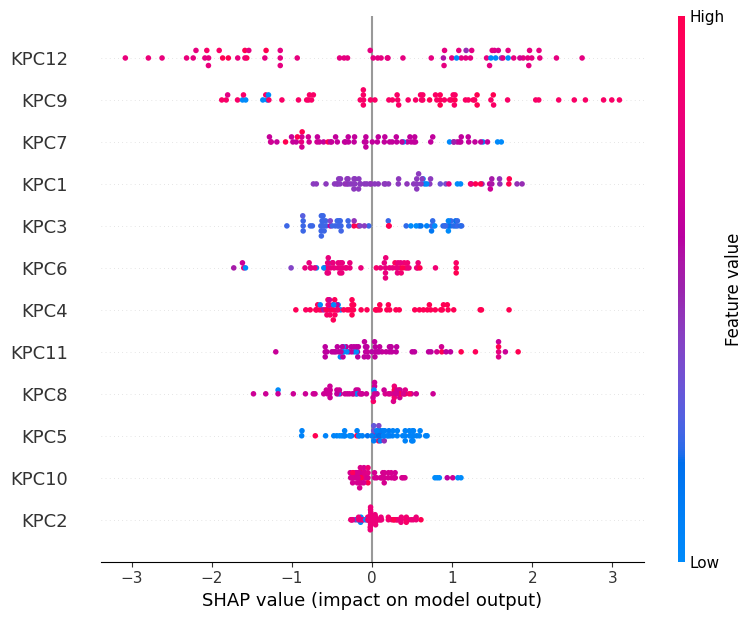

[[ 2 15]
 [ 4 47]]
0.7205882352941176
0.5196078431372548
0.831858407079646
0.7580645161290323
0.9215686274509803
0.6482122260668974


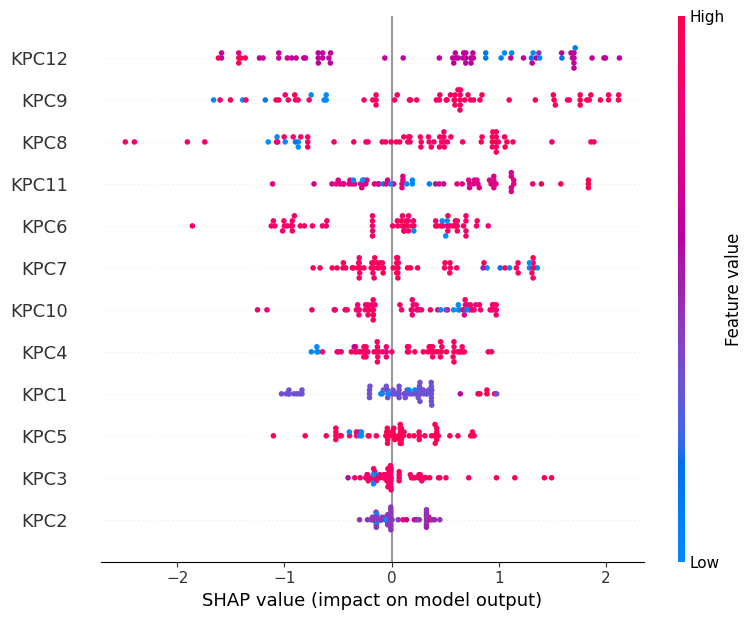

[[ 6 11]
 [14 37]]
0.6323529411764706
0.5392156862745098
0.7474747474747475
0.7708333333333334
0.7254901960784313
0.5743944636678201


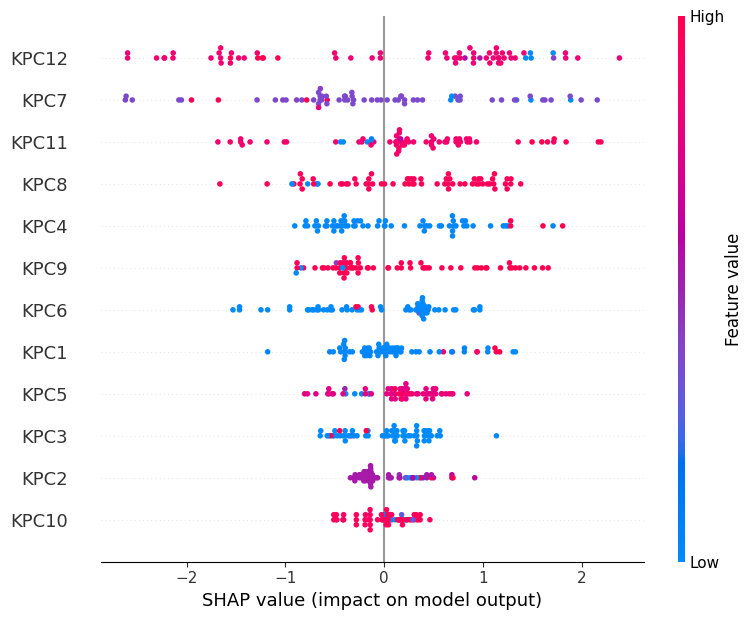

[[ 6 10]
 [ 9 42]]
0.7164179104477612
0.5992647058823529
0.8155339805825242
0.8076923076923077
0.8235294117647058
0.7450980392156863


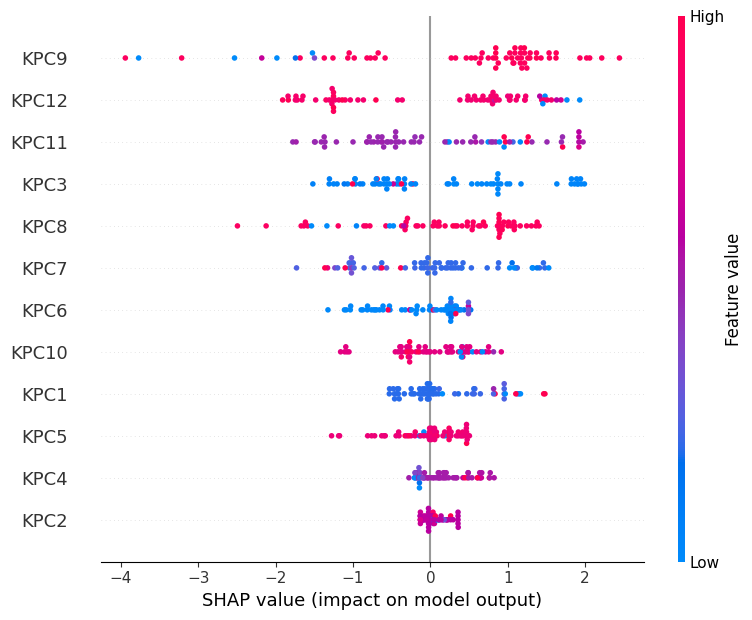

[[ 9  8]
 [ 4 47]]
0.8235294117647058
0.7254901960784313
0.8867924528301887
0.8545454545454545
0.9215686274509803
0.7410611303344867


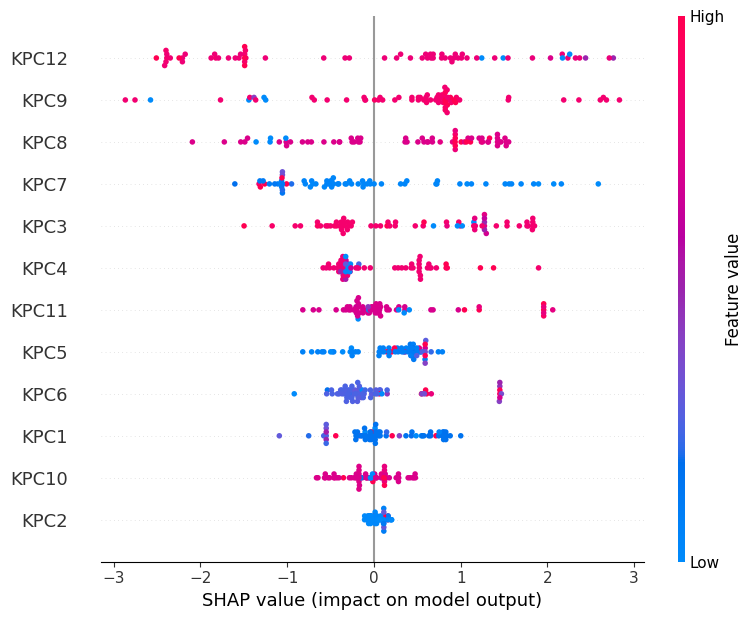

[[ 7 10]
 [11 40]]
0.6911764705882353
0.5980392156862745
0.792079207920792
0.8
0.7843137254901961
0.6632064590542098


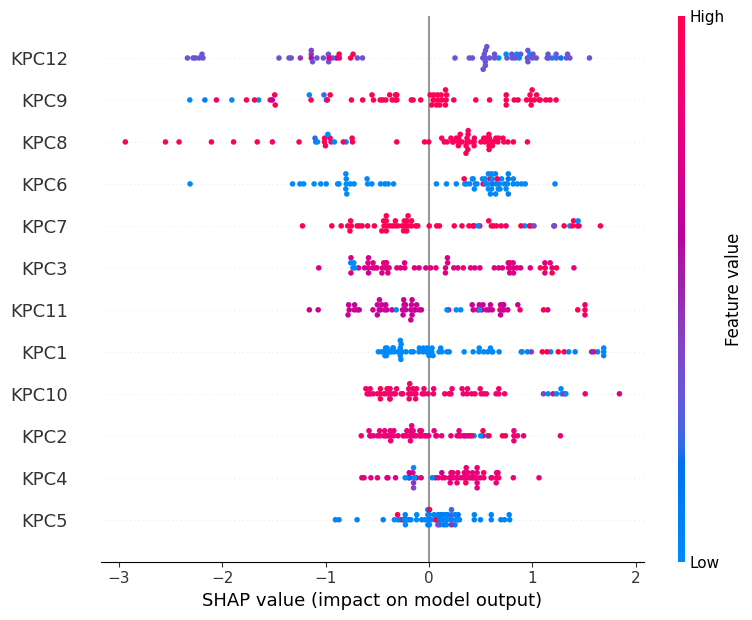

[[ 6 11]
 [10 41]]
0.6911764705882353
0.5784313725490197
0.7961165048543688
0.7884615384615384
0.803921568627451
0.6193771626297577


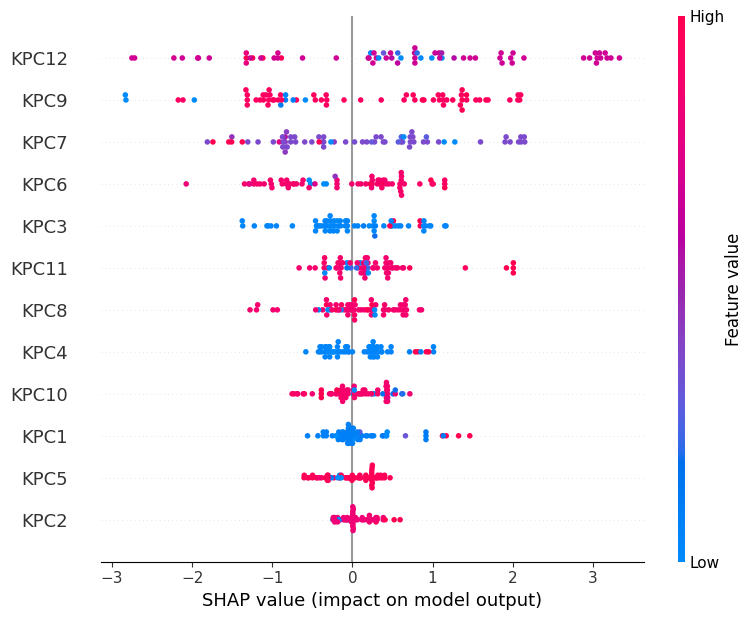

[[ 5 11]
 [12 39]]
0.6567164179104478
0.5386029411764706
0.7722772277227723
0.78
0.7647058823529411
0.6158088235294118


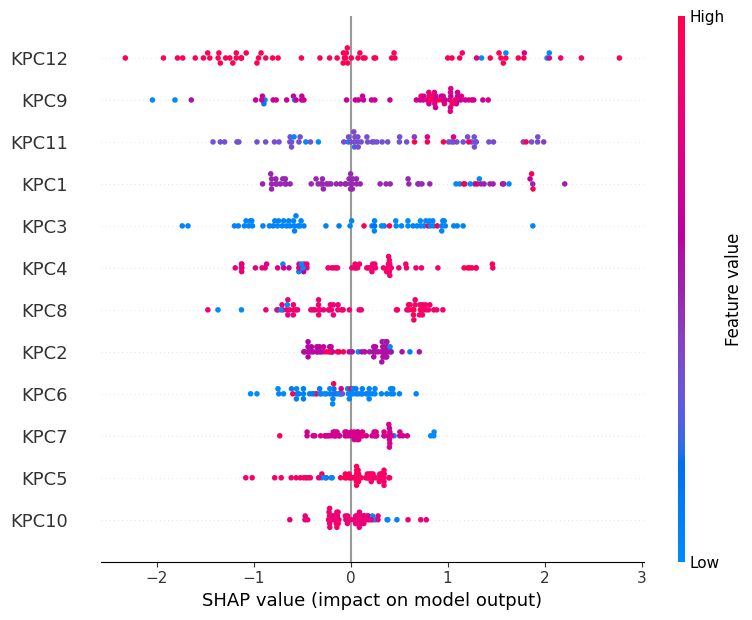

[[ 3 14]
 [ 7 44]]
0.6911764705882353
0.5196078431372549
0.8073394495412843
0.7586206896551724
0.8627450980392157
0.6897347174163784


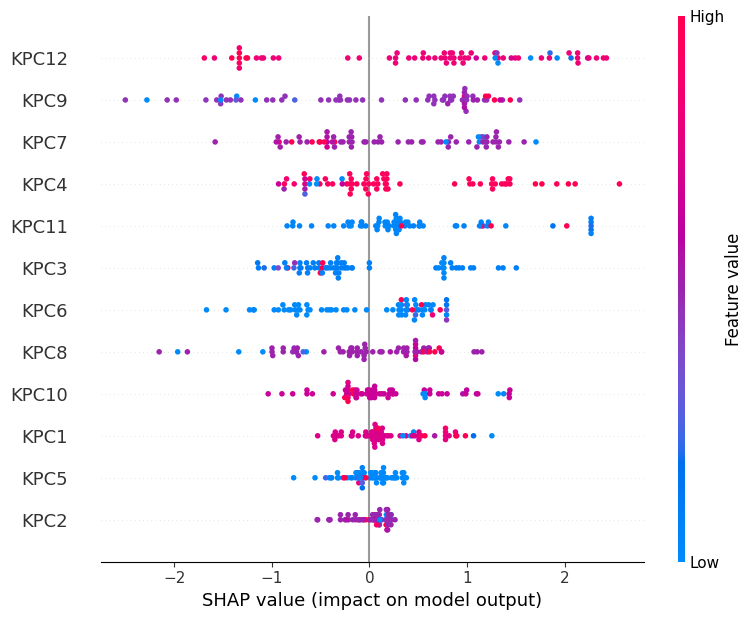

[[ 5 12]
 [ 9 42]]
0.6911764705882353
0.5588235294117647
0.7999999999999999
0.7777777777777778
0.8235294117647058
0.5847750865051903


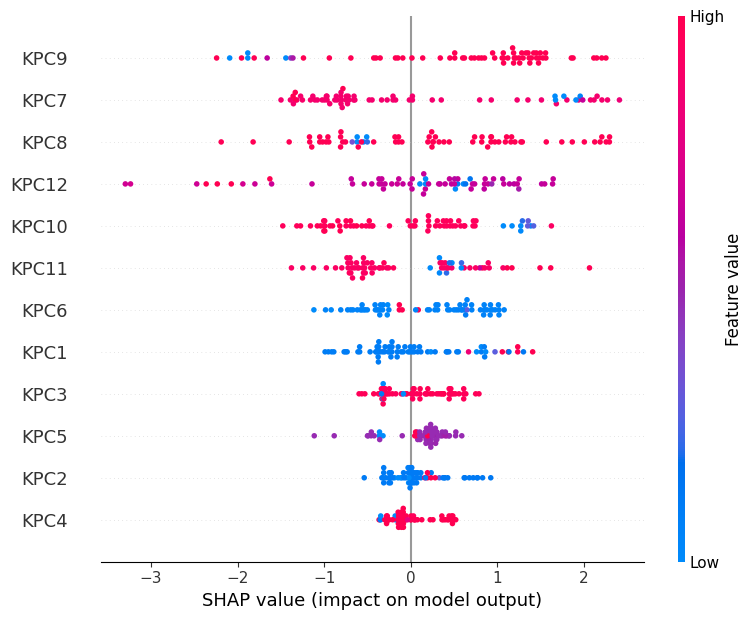

[[ 2 15]
 [11 40]]
0.6176470588235294
0.45098039215686275
0.7547169811320754
0.7272727272727273
0.7843137254901961
0.5028835063437139


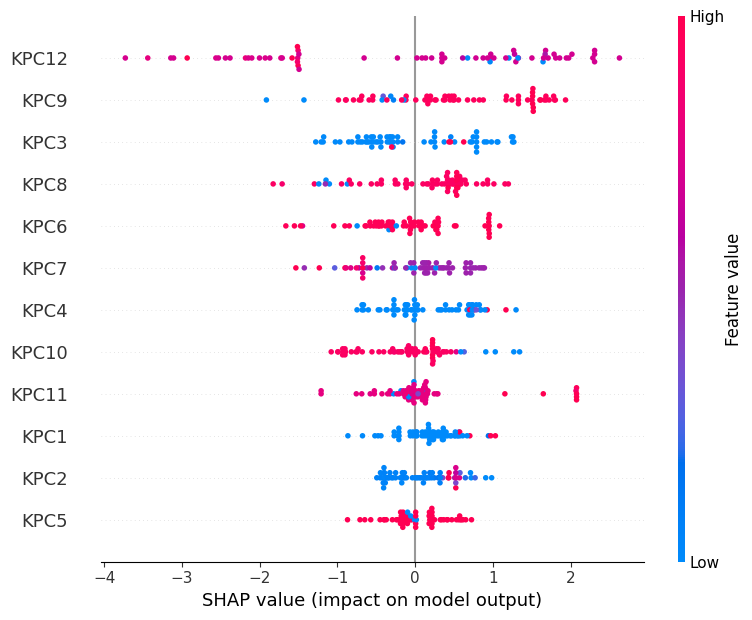

[[ 4 12]
 [ 6 45]]
0.7313432835820896
0.5661764705882353
0.8333333333333333
0.7894736842105263
0.8823529411764706
0.6568627450980392


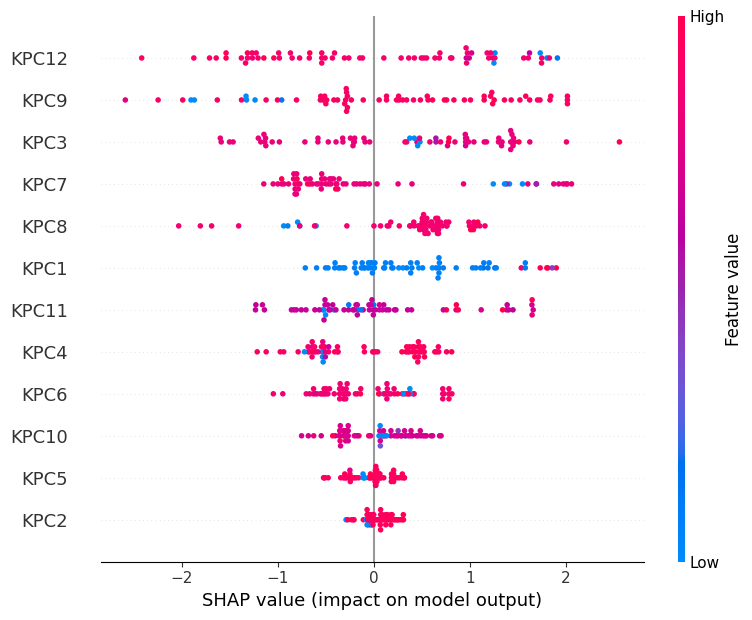

[[ 5 12]
 [ 4 47]]
0.7647058823529411
0.6078431372549019
0.8545454545454545
0.7966101694915254
0.9215686274509803
0.7468281430219145


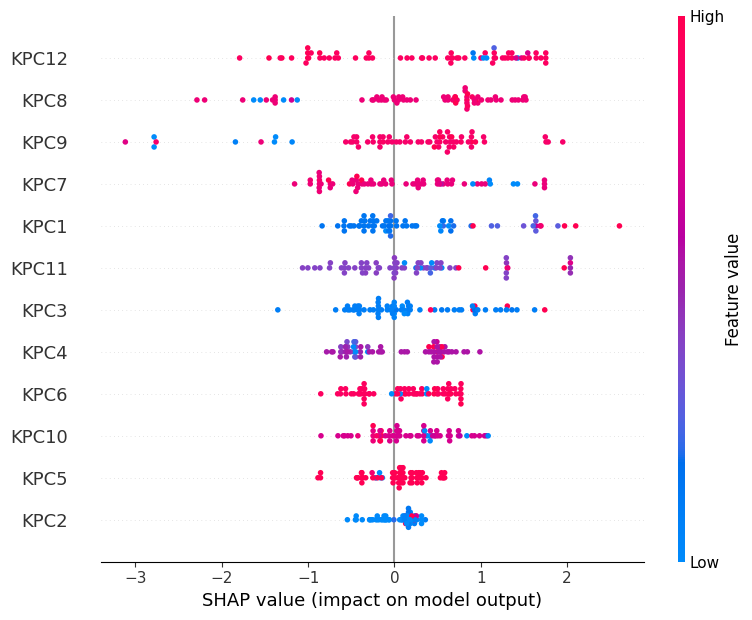

[[ 8  9]
 [10 41]]
0.7205882352941176
0.6372549019607843
0.8118811881188118
0.82
0.803921568627451
0.6931949250288351


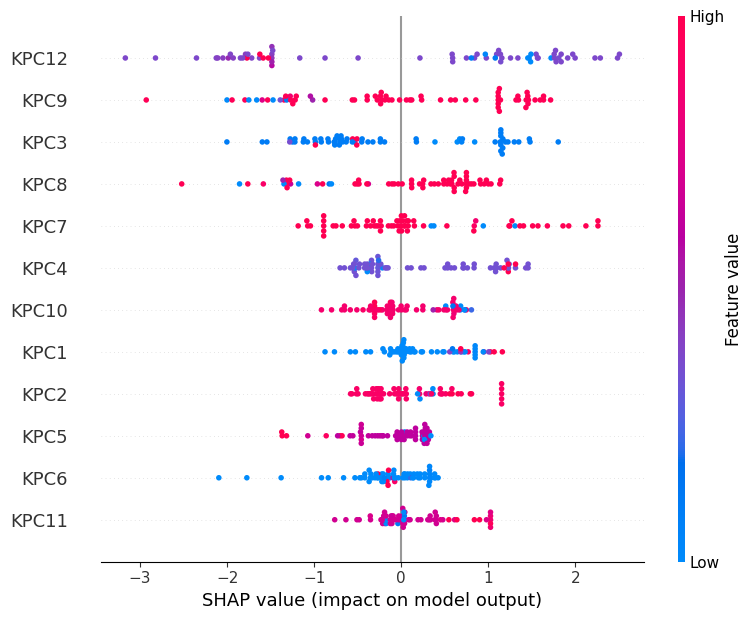

[[ 9  8]
 [15 36]]
0.6617647058823529
0.6176470588235294
0.7578947368421053
0.8181818181818182
0.7058823529411765
0.6885813148788927


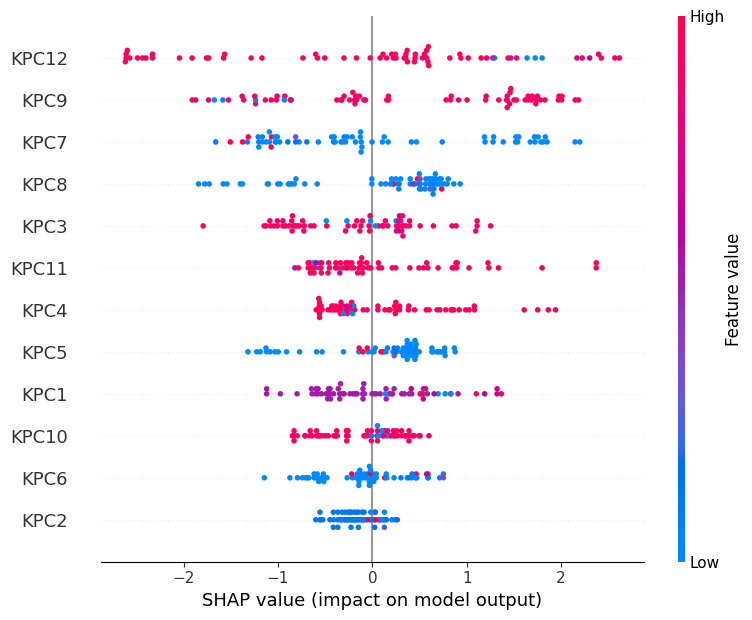

[[ 5 11]
 [10 41]]
0.6865671641791045
0.5582107843137255
0.7961165048543688
0.7884615384615384
0.803921568627451
0.5980392156862745


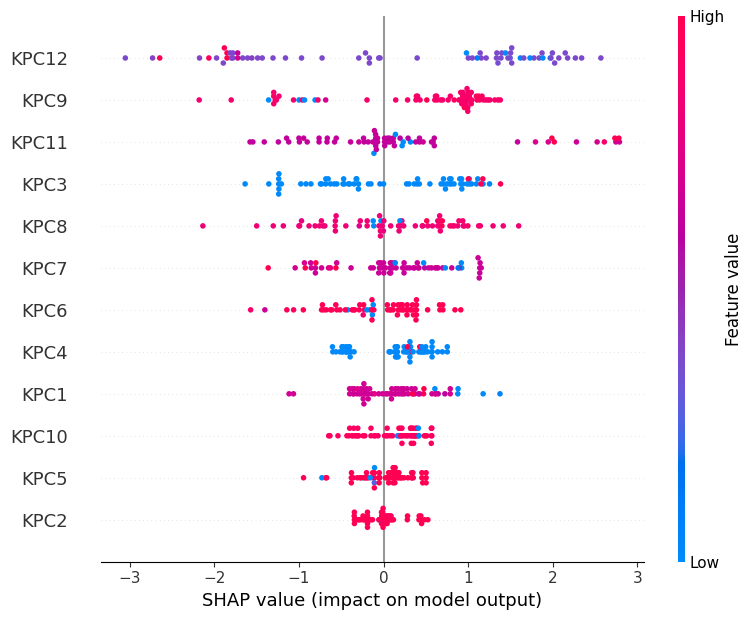

[[ 4 13]
 [ 6 45]]
0.7205882352941176
0.5588235294117647
0.8256880733944953
0.7758620689655172
0.8823529411764706
0.6770472895040369


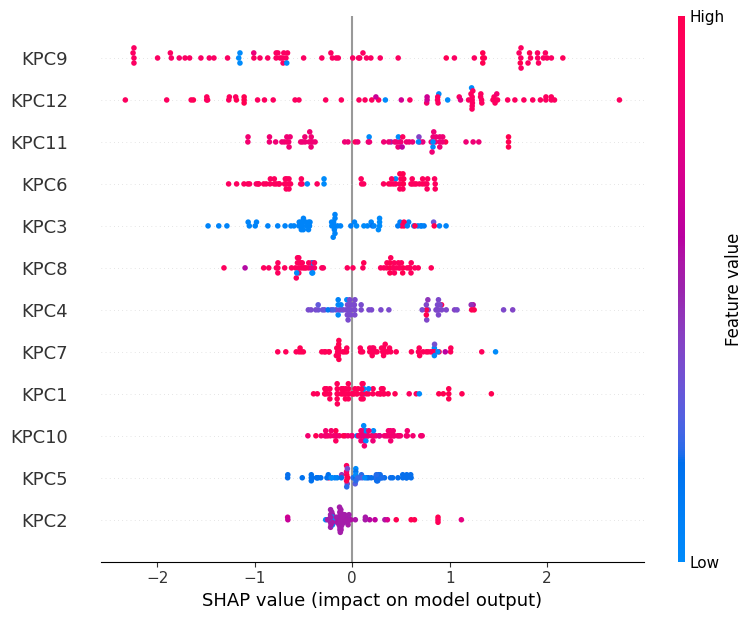

[[ 6 11]
 [ 9 42]]
0.7058823529411765
0.5882352941176471
0.8076923076923077
0.7924528301886793
0.8235294117647058
0.6943483275663206


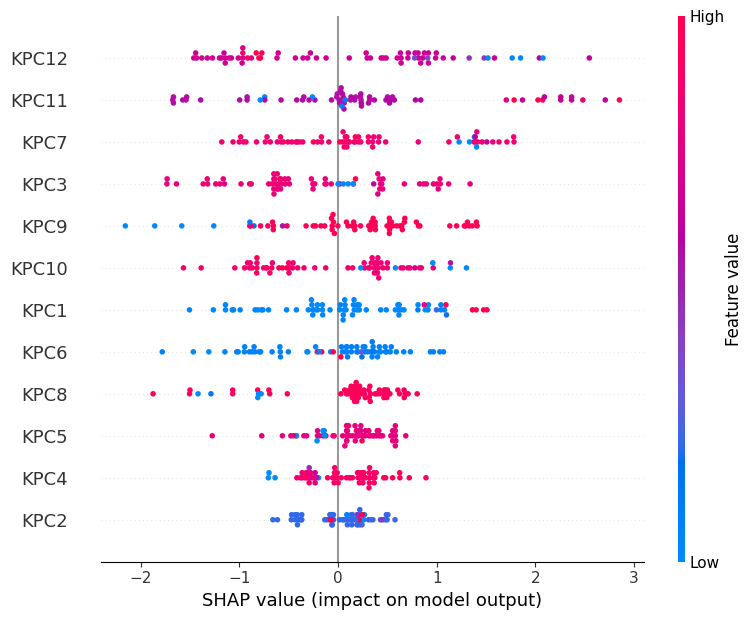

[[ 6 11]
 [11 40]]
0.6764705882352942
0.5686274509803921
0.7843137254901961
0.7843137254901961
0.7843137254901961
0.6643598615916955


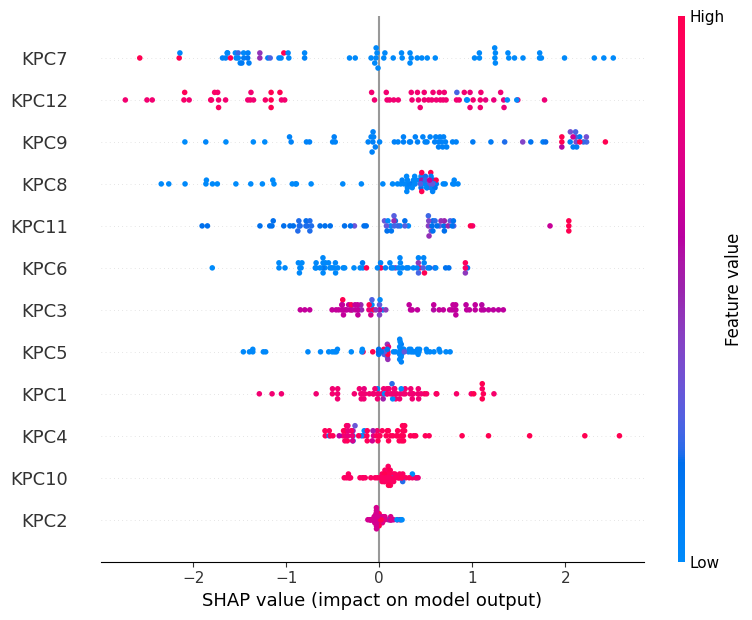

[[ 2 14]
 [ 5 46]]
0.7164179104477612
0.5134803921568627
0.8288288288288289
0.7666666666666667
0.9019607843137255
0.6060049019607843


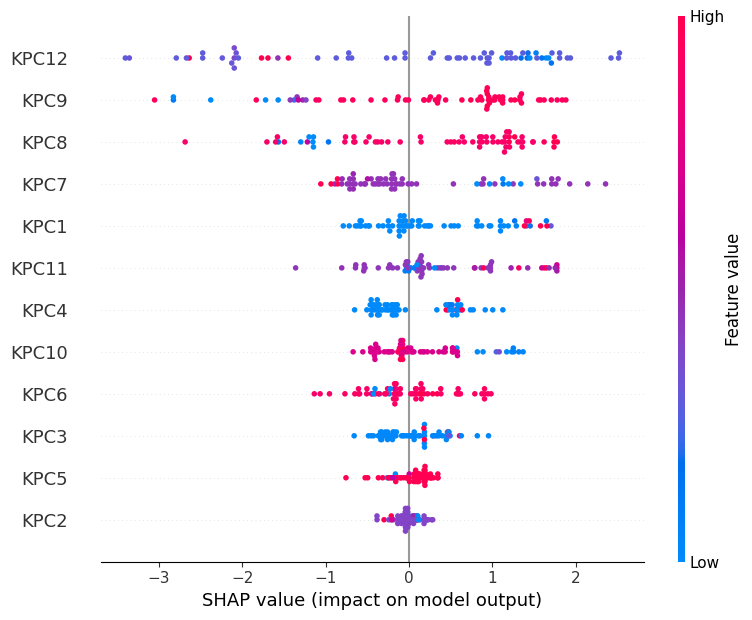

In [6]:
rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)

df_metrics = pd.DataFrame(columns=['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score',
                                   'roc_auc', 'specificity'],
                         index = ['fold' + str(x) for x in range(1,(n_splits*n_repeats +1))])


for i, (train_index, test_index) in enumerate(rkf.split(X,y)):
    
    X_train=X.iloc[train_index]
    y_train=y.iloc[train_index]
    X_test=X.iloc[test_index]
    y_test=y.iloc[test_index]


    xgboost = XGBClassifier(seed=1234)

    xgboost = xgboost.fit(X_train,y_train)
    y_pred_proba = xgboost.predict_proba(X_test)[:,1]
    # # Get predicted probability
    y_pred = xgboost.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]
    
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    spe= tn / (tn + fp)
    
    # Fill in the dataframe with metrics
    df_metrics.iloc[i] = [acc, bal_acc, f1score, precision, recall, roc_auc, spe]
    
    print(acc)
    print(bal_acc)
    print(f1score)
    print(precision)
    print(recall)
    print(roc_auc)

#     Add feature importance with SHAP

    explainer = shap.TreeExplainer(xgboost)
    shap_values = explainer.shap_values(X_test)
    #shap.summary_plot(shap_values, X_test, plot_type="bar")
    shap.summary_plot(shap_values, X_test)

In [7]:
df_metrics

,accuracy,balanced_accuracy,precision,recall,f1score,roc_auc,specificity
fold1,0.735294,0.647059,0.823529,0.823529,0.823529,0.768166,0.470588
fold2,0.720588,0.519608,0.831858,0.758065,0.921569,0.648212,0.117647
fold3,0.632353,0.539216,0.747475,0.770833,0.72549,0.574394,0.352941
fold4,0.716418,0.599265,0.815534,0.807692,0.823529,0.745098,0.375
fold5,0.823529,0.72549,0.886792,0.854545,0.921569,0.741061,0.529412
fold6,0.691176,0.598039,0.792079,0.8,0.784314,0.663206,0.411765
fold7,0.691176,0.578431,0.796117,0.788462,0.803922,0.619377,0.352941
fold8,0.656716,0.538603,0.772277,0.78,0.764706,0.615809,0.3125
fold9,0.691176,0.519608,0.807339,0.758621,0.862745,0.689735,0.176471
fold10,0.691176,0.558824,0.8,0.777778,0.823529,0.584775,0.294118


## Compute mean and standard deviation of metrics

In [8]:
print(f'The mean accuracy is: {np.mean(df_metrics["accuracy"])*100:.1f} (±{np.std(df_metrics["accuracy"])*100:.1f}) ')
print(f'The mean balanced accuracy is: {np.mean(df_metrics["balanced_accuracy"])*100:.1f} (±{np.std(df_metrics["balanced_accuracy"])*100:.1f}) ')
print(f'The mean precision is: {np.mean(df_metrics["precision"])*100:.1f} (±{np.std(df_metrics["precision"])*100:.1f}) ')
print(f'The mean recall is: {np.mean(df_metrics["recall"])*100:.1f} (±{np.std(df_metrics["recall"])*100:.1f}) ')
print(f'The mean F1 score is: {np.mean(df_metrics["f1score"])*100:.1f} (±{np.std(df_metrics["f1score"])*100:.1f}) ')
print(f'The mean ROC AUC is: {np.mean(df_metrics["roc_auc"])*100:.1f} (±{np.std(df_metrics["roc_auc"])*100:.1f}) ')
print(f'The mean specificity is: {np.mean(df_metrics["specificity"])*100:.1f} (±{np.std(df_metrics["specificity"])*100:.1f}) ')

The mean accuracy is: 70.3 (±4.4) 
The mean balanced accuracy is: 57.5 (±5.7) 
The mean precision is: 80.6 (±3.3) 
The mean recall is: 78.9 (±2.7) 
The mean F1 score is: 82.7 (±6.2) 
The mean ROC AUC is: 65.9 (±6.5) 
The mean specificity is: 32.2 (±12.3) 


## Compute 95% CI

In [9]:
acc_ci= np.percentile(df_metrics["accuracy"], [2.5,97.5])
bal_acc_ci= np.percentile(df_metrics["balanced_accuracy"], [2.5,97.5])
precision_ci = np.percentile(df_metrics["precision"], [2.5,97.5])
recall_ci= np.percentile(df_metrics["recall"], [2.5,97.5])
f1_ci = np.percentile(df_metrics["f1score"], [2.5,97.5])
roc_auc_ci = np.percentile(df_metrics["roc_auc"], [2.5,97.5])
specificity_ci = np.percentile(df_metrics['specificity'], [2.5,97.5])

print(f'The confidence interval for accuracy is [{acc_ci[0]*100:.1f} ; {acc_ci[1]*100:.1f}]')
print(f'The confidence interval for balanced accucary is [{bal_acc_ci[0]*100:.1f} ; {bal_acc_ci[1]*100:.1f}]')
print(f'The confidence interval for precision is [{precision_ci[0]*100:.1f} ; {precision_ci[1]*100:.1f}]')
print(f'The confidence interval for recall is [{recall_ci[0]*100:.1f} ; {recall_ci[1]*100:.1f}]')
print(f'The confidence interval for F1 score is [{f1_ci[0]*100:.1f} ; {f1_ci[1]*100:.1f}]')
print(f'The confidence interval for ROC AUC score is [{roc_auc_ci[0]*100:.1f} ; {roc_auc_ci[1]*100:.1f}]')
print(f'The confidence interval for specificity score is [{specificity_ci[0]*100:.1f} ; {specificity_ci[1]*100:.1f}]')

The confidence interval for accuracy is [62.5 ; 79.6]
The confidence interval for balanced accucary is [48.1 ; 68.8]
The confidence interval for precision is [75.1 ; 87.1]
The confidence interval for recall is [74.2 ; 84.0]
The confidence interval for F1 score is [71.5 ; 92.2]
The confidence interval for ROC AUC score is [53.7 ; 75.8]
The confidence interval for specificity score is [11.8 ; 52.9]
